In [1]:
import spot
spot.setup()

In [2]:
def seminator(filename, opt = ''):
    a = spot.automaton(f'seminator {opt} -s0 {filename} |')
    display(a)
    return a

def seminator_form(formula, opt = ''):
    a = spot.automaton(f'ltl2tgba "{formula}" | seminator {opt} -s0 |')
    display(a)
    return a

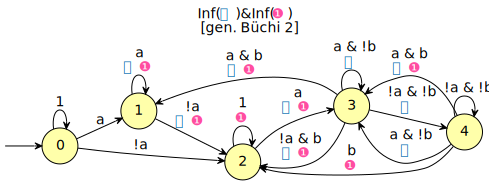

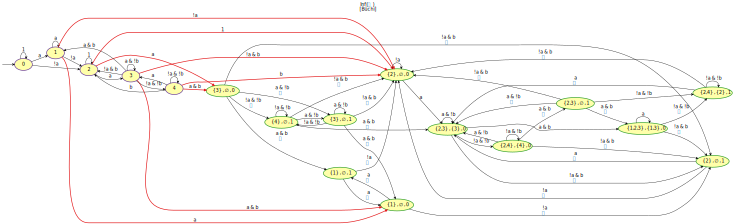

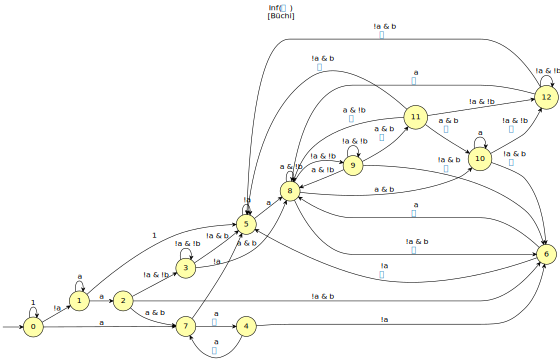

In [3]:
f = "FG(a | XF(a & XFb))"
in_a = spot.translate(f)
display(in_a)
seminator_form(f, '--highlight').postprocess()

## Test implementation

In [4]:
option = "skip-levels"

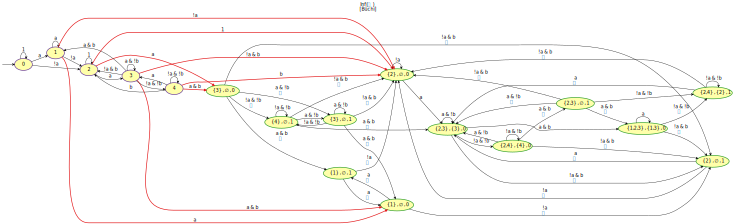

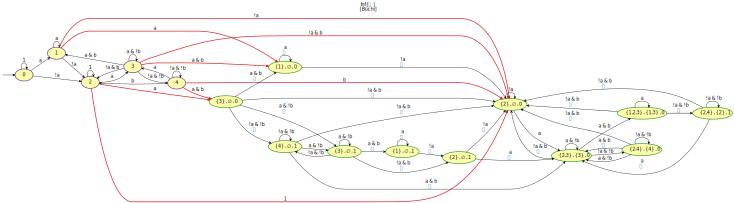

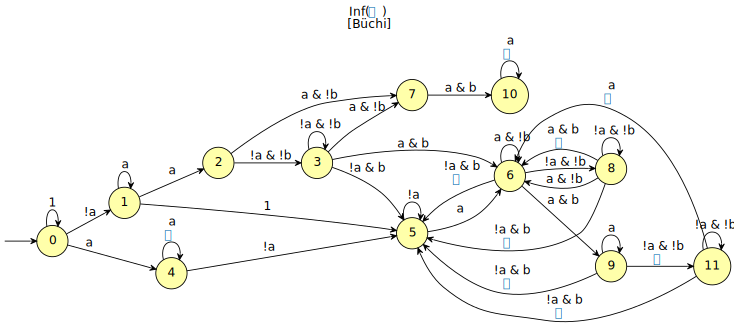

In [5]:
seminator_form(f,f"--highlight")
res = seminator_form(f,f"--highlight --{option}")
res.postprocess()